In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
import nltk
import re

In [2]:
import plotly.io as pio
pio.renderers.default = "notebook"

In [3]:
data = pd.read_excel('../data/DatasetFV.xlsx', index_col=0)

In [4]:
data.head()

,County,HousingUnits,MedianRooms,MedianPrice,population,MedianAge,VacantHousingUnits,OwnerOccupied,RenterOccupied,Households,...,Humidity,LowTemp,PrecipDays,Precipitation,Pressure,SnowDays,UVIndex,WindSpeed,Desempleo,Ti
0,Alachua,118861,5.1,201600,268105,31.7,118861,55696,46283,50803,...,75,52,4,2.8,30.1,0,4,6,4.6,56.877721
1,Baker,10105,5.9,158000,28679,37.8,10105,6756,2072,6448,...,75,51,6,2.9,30.1,0,4,5,4.8,78.135699
2,Bay,104060,5.0,195000,180076,40.6,104060,49474,24062,47432,...,75,52,7,5.7,30.1,0,4,9,5.1,67.393408
3,Bradford,11061,5.4,118900,27723,39.8,11061,6147,3171,5882,...,75,52,5,2.7,30.1,0,4,6,5.1,65.517679
4,Brevard,280648,5.5,220000,594001,47.2,280648,178469,57536,148934,...,76,62,4,2.1,30.1,0,5,9,5.1,75.942800


# Data exploration

## 1. Data quality

In [5]:
data.columns

Index(['County', 'HousingUnits', 'MedianRooms', 'MedianPrice', 'population',
       'MedianAge', 'VacantHousingUnits', 'OwnerOccupied', 'RenterOccupied',
       'Households', 'MedianHouseholdIncome', 'MedianFamilyIncome',
       'PerCapitaIncome', 'NonfamilyHouseholds', 'MedianNonfamilyIncome',
       'NumState', 'State', 'LandAreakm2', 'Latitude', 'Longitude',
       'Population2010', 'Areakm2', 'WaterAreakm2', 'CloudCover', 'DryDays',
       'FogDays', 'HighTemp', 'HoursofSun', 'Humidity', 'LowTemp',
       'PrecipDays', 'Precipitation', 'Pressure', 'SnowDays', 'UVIndex',
       'WindSpeed', 'Desempleo', 'Ti'],
      dtype='object')

In [6]:
len(data.columns)

38

In [7]:
data.dtypes

County                    object
HousingUnits               int64
MedianRooms              float64
MedianPrice                int64
population                 int64
MedianAge                float64
VacantHousingUnits         int64
OwnerOccupied              int64
RenterOccupied             int64
Households                 int64
MedianHouseholdIncome      int64
MedianFamilyIncome         int64
PerCapitaIncome            int64
NonfamilyHouseholds        int64
MedianNonfamilyIncome      int64
NumState                   int64
State                     object
LandAreakm2              float64
Latitude                 float64
Longitude                float64
Population2010             int64
Areakm2                  float64
WaterAreakm2             float64
CloudCover                 int64
DryDays                    int64
FogDays                    int64
HighTemp                   int64
HoursofSun                 int64
Humidity                   int64
LowTemp                    int64
PrecipDays

In [8]:
data.isnull().sum()

County                   0
HousingUnits             0
MedianRooms              0
MedianPrice              0
population               0
MedianAge                0
VacantHousingUnits       0
OwnerOccupied            0
RenterOccupied           0
Households               0
MedianHouseholdIncome    0
MedianFamilyIncome       0
PerCapitaIncome          0
NonfamilyHouseholds      0
MedianNonfamilyIncome    0
NumState                 0
State                    0
LandAreakm2              0
Latitude                 0
Longitude                0
Population2010           0
Areakm2                  0
WaterAreakm2             0
CloudCover               0
DryDays                  0
FogDays                  0
HighTemp                 0
HoursofSun               0
Humidity                 0
LowTemp                  0
PrecipDays               0
Precipitation            0
Pressure                 0
SnowDays                 0
UVIndex                  0
WindSpeed                0
Desempleo                0
T

Todas las variables estan completas, por lo que no hay necesidad de usar alguna estrategia para rellenar datos nulos o eliminarlos.

## 2. Comportamiento de los datos

In [9]:
data.describe()

,HousingUnits,MedianRooms,MedianPrice,population,MedianAge,VacantHousingUnits,OwnerOccupied,RenterOccupied,Households,MedianHouseholdIncome,...,Humidity,LowTemp,PrecipDays,Precipitation,Pressure,SnowDays,UVIndex,WindSpeed,Desempleo,Ti
count,5.280000e+02,528.000000,528.000000,5.280000e+02,528.000000,5.280000e+02,528.000000,528.000000,528.000000,528.000000,...,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,5.789136e+04,5.691856,169215.909091,1.337762e+05,42.342803,5.789136e+04,33450.420455,16691.034091,33122.589015,54899.795455,...,76.909091,39.564394,7.554924,4.562879,30.097727,1.056818,2.640152,7.079545,5.325568,71.462312
std,1.064192e+05,0.473581,90768.579589,2.612661e+05,5.310259,1.064192e+05,59743.836911,37098.282784,62468.024602,17298.738351,...,3.012824,8.712987,2.072869,1.131465,0.014917,1.657766,1.015654,1.387570,1.353080,8.597604
min,1.057000e+03,4.000000,44100.000000,1.596000e+03,24.000000,1.057000e+03,506.000000,125.000000,442.000000,25712.000000,...,71.000000,18.000000,3.000000,1.200000,30.000000,0.000000,1.000000,5.000000,2.700000,20.182310
25%,9.368750e+03,5.400000,106825.000000,1.888350e+04,39.100000,9.368750e+03,5233.500000,1792.750000,4828.000000,43419.000000,...,75.000000,34.000000,7.000000,4.000000,30.100000,0.000000,2.000000,6.000000,4.400000,66.754837
50%,2.017600e+04,5.600000,148000.000000,4.239700e+04,41.900000,2.017600e+04,11682.500000,4527.000000,10708.500000,51522.000000,...,76.000000,40.000000,7.000000,4.500000,30.100000,0.000000,3.000000,7.000000,5.200000,72.740528
75%,5.260225e+04,5.900000,207300.000000,1.163325e+05,45.400000,5.260225e+04,30906.750000,12864.250000,30246.000000,62009.250000,...,78.000000,45.000000,8.000000,5.200000,30.100000,1.000000,3.000000,8.000000,6.025000,77.243830
max,1.032310e+06,7.700000,731700.000000,2.705528e+06,68.000000,1.032310e+06,465833.000000,436367.000000,619475.000000,147111.000000,...,87.000000,67.000000,17.000000,7.500000,30.100000,9.000000,5.000000,14.000000,12.300000,93.298566


### 2.1. Medidas estadisticas descriptivas por County y State

In [11]:
print(f"Cantidad de estados: {data['State'].nunique()}")
print(f"Cantidad de condados o ciudades: {data['County'].nunique()}")

Cantidad de estados: 7
Cantidad de condados o ciudades: 418


In [15]:
data.groupby('State').nunique()['County']

State
FL     62
GA    157
NC     99
NJ     20
NY     56
SC     45
VA     85
Name: County, dtype: int64

In [16]:
data.groupby('State').count()

,County,HousingUnits,MedianRooms,MedianPrice,population,MedianAge,VacantHousingUnits,OwnerOccupied,RenterOccupied,Households,...,Humidity,LowTemp,PrecipDays,Precipitation,Pressure,SnowDays,UVIndex,WindSpeed,Desempleo,Ti
State,,,,,,,,,,,,,,,,,,,,,
FL,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
GA,157,157,157,157,157,157,157,157,157,157,...,157,157,157,157,157,157,157,157,157,157
NC,99,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
NJ,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
NY,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
SC,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
VA,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89


In [23]:
df1 = data.groupby('State')['County'].count().reset_index()
df1 = df1.sort_values(by='State', ascending=False)
fig = px.bar(df1, x='State', y='County', title='Cantidad de condados o ciudades por estado')
fig.show()

In [20]:
grouped_data = data.groupby('County').count()
sorted_data = grouped_data.sort_values(by=grouped_data.columns[0], ascending=False)

sorted_data[0:10]

,HousingUnits,MedianRooms,MedianPrice,population,MedianAge,VacantHousingUnits,OwnerOccupied,RenterOccupied,Households,MedianHouseholdIncome,...,Humidity,LowTemp,PrecipDays,Precipitation,Pressure,SnowDays,UVIndex,WindSpeed,Desempleo,Ti
County,,,,,,,,,,,,,,,,,,,,,
Franklin,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Lee,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Madison,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Union,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Washington,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Warren,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Orange,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Greene,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Montgomery,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


Condados con mayor cantidad de datos y a cuales estados pertenecen

In [21]:
top_counties = sorted_data.head(10)  
county_to_state = {county: data[data['County'] == county]['State'].values[0] for county in top_counties.index}

county_to_state

{'Franklin': 'FL',
 'Lee': 'FL',
 'Madison': 'FL',
 'Union': 'FL',
 'Washington': 'FL',
 'Warren': 'NJ',
 'Orange': 'FL',
 'Greene': 'NY',
 'Montgomery': 'NY',
 'Richmond': 'NC'}

#### Se haran graficos de barras por variable agrupadas por State: hacer para las variables con mayor correlacion y relevancia para la variable objetivo.

## 3. Comportamiento variable objetivo: MedianPrice

In [48]:
data['MedianPrice'].describe()

count       528.000000
mean     169215.909091
std       90768.579589
min       44100.000000
25%      106825.000000
50%      148000.000000
75%      207300.000000
max      731700.000000
Name: MedianPrice, dtype: float64

In [49]:
scatter_fig = px.scatter(data, x=data.index, y='MedianPrice', title='Gráfico de Dispersión de MedianPrice')
scatter_fig.update_xaxes(title='Data') 
scatter_fig.update_yaxes(title='Median Price')  
scatter_fig.show()

In [50]:
# Boxplot
boxplot_fig = px.box(data, y='MedianPrice', title='Boxplot de MedianPrice')
boxplot_fig.update_yaxes(title='Median Price') 
boxplot_fig.show()

In [51]:
median_price_range = data['MedianPrice'].max() - data['MedianPrice'].min()

print(f"El rango de la variable 'MedianPrice' es: {median_price_range}")

El rango de la variable 'MedianPrice' es: 687600


In [52]:
data.groupby('State').describe()['MedianPrice']

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
FL,62.0,178138.709677,84681.875961,72100.0,108475.0,166550.0,229925.0,558100.0
GA,157.0,134515.286624,59319.839468,44100.0,89800.0,121900.0,166900.0,362300.0
NC,99.0,157564.646465,56483.828845,75600.0,120550.0,149300.0,182900.0,331800.0
NJ,20.0,323800.000000,98892.179458,166400.0,250775.0,320750.0,405275.0,477400.0
NY,56.0,178228.571429,102782.166324,78400.0,120025.0,142450.0,188475.0,544100.0
SC,45.0,132755.555556,59228.120454,47100.0,91700.0,114700.0,159200.0,334600.0
VA,89.0,215200.000000,115982.888628,69500.0,130000.0,194000.0,252600.0,731700.0


El estado con la mediana mas alta no corresponde al estado con el valor maximo total del precio

#### 3.3 MedianPrice x State y county

In [55]:
df1 = data.groupby('State')['MedianPrice'].median().reset_index()
df1 = df1.sort_values(by='State', ascending=False)
fig = px.bar(df1, x='State', y='MedianPrice', title='Mediana precio por estado')
fig.show()

In [57]:
df1 = data.groupby('State')['MedianPrice'].max().reset_index()
df1 = df1.sort_values(by='State', ascending=False)
fig = px.bar(df1, x='State', y='MedianPrice', title='Máximo precio por estado')
fig.show()

In [58]:
df1 = data.groupby('State')['MedianPrice'].min().reset_index()
df1 = df1.sort_values(by='State', ascending=False)
fig = px.bar(df1, x='State', y='MedianPrice', title='Minímo precio por estado')
fig.show()

El estado con el valor minimo mas pequeño, tiene el valor maximo mas bajo al igual que el valor medio ... es un comportamiento coherente

In [59]:
df1 = data.groupby('County')['MedianPrice'].median().reset_index()
df1 = df1.sort_values(by='County', ascending=False).head(10)
fig = px.bar(df1, x='County', y='MedianPrice', title='Top 10 County con mayor Mediana precio')
fig.show()

In [60]:
county_top_state = {county: data[data['County'] == county]['State'].values[0] for county in df1['County']}

county_top_state

{'York': 'VA',
 'Yates': 'NY',
 'Yancey': 'NC',
 'Yadkin': 'NC',
 'Wythe': 'VA',
 'Wyoming': 'NY',
 'Worth': 'GA',
 'Wise': 'VA',
 'Wilson': 'NC',
 'Williamsburg': 'SC'}

Los county con mayor valor de MedianPrice no necesariamente quedan en los estados con mayor MedianPrice

### 3.4 Dispersion y rangos MedianPrice por State

In [61]:
# Gráfico de dispersión por State
scatter_fig = px.scatter(data, x='State', y='MedianPrice', title='Gráfico de Dispersión de MedianPrice por State')
scatter_fig.update_xaxes(title='State') 
scatter_fig.update_yaxes(title='Median Price')  
scatter_fig.show()

In [62]:
# Boxplot por State
boxplot_fig = px.box(data, x='State', y='MedianPrice', title='Boxplot de MedianPrice por State')
boxplot_fig.update_xaxes(title='State')  
boxplot_fig.update_yaxes(title='Median Price') 
boxplot_fig.show()

### 4.1 PCA

In [63]:
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns

In [65]:
columnas_excluidas = ['State', 'County', 'NumState', 'NumCounty']
columnas_a_analizar = [col for col in data.columns if col not in columnas_excluidas]

scaler = MinMaxScaler()
pca = PCA(n_components=3)
values = data[columnas_a_analizar].values
values = scaler.fit_transform(values)

In [66]:
data[['pca1', 'pca2', 'pca3']] = pca.fit_transform(values)

In [67]:
fig = px.scatter_3d(data, x='pca1', y='pca2', z='pca3', color='State', title='PCA')
fig.update_traces(marker=dict(size=4))
fig.show()

### 4.2 Clustering

### 5.1 Correlaciones numericas

In [69]:
columnas_excluidas = ['State', 'County', 'NumState', 'NumCounty']
columnas_a_analizar = [col for col in data.columns if col not in columnas_excluidas]
values = data[columnas_a_analizar]

/var/folders/rv/dlx920mn2hj15wkt3g1nkdkn3dpgn4/T/ipykernel_16171/1029353156.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



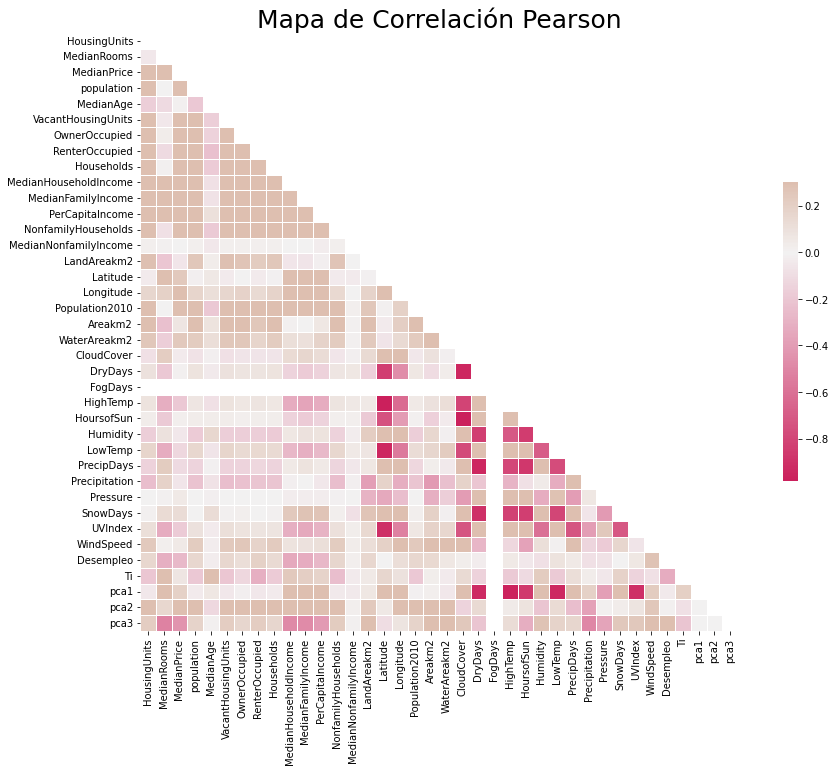

In [70]:
df_corr = values.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(16, 11))
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Mapa de Correlación Pearson', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

##### Se observa correlacion negativa significativa entre:
- DryDays - Latitude
- HighTemp - Latitude
- UVIndex - Latitude
- HoursofSun - Latitude
- LowTemp - Latitude
___________________________
- DryDays - CloudCover
- HighTemp - CloudCover
- HoursofSun - CloudCover
- LowTemp - CloudCover
- UVIndex - CloudCover
____________________________
- Humidity - DryDays
- PrecipDays - DryDays
- SnowDays - DryDays
_____________________________
- Humidity - HighTemp
- PrecipDays - HighTemp
- SnowDays - HighTemp
_____________________________
- Humidity - HoursofSun
- PrecipDays - HoursofSun
- SnowDays - HoursofSun
____________________________
- Lowtemp - Humidity 

/usr/local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



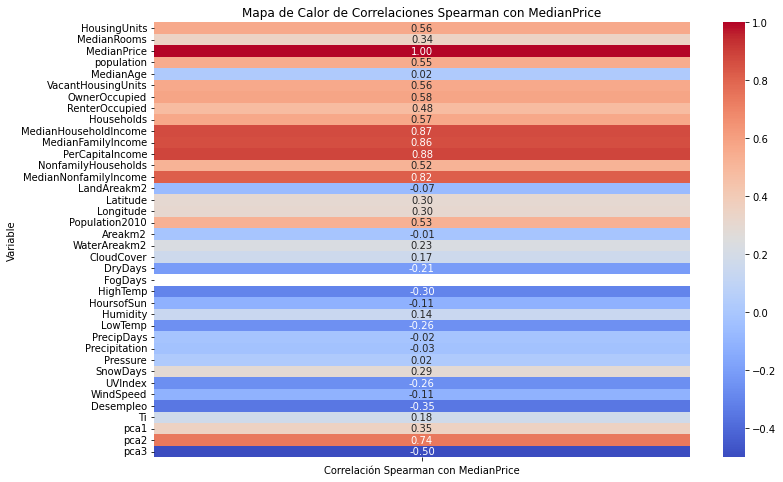

In [72]:
columnas_numericas = values
correlacion_spearman = columnas_numericas.corrwith(data['MedianPrice'], method='spearman')

correlaciones_df = pd.DataFrame({'Variable': correlacion_spearman.index, 'Correlación Spearman con MedianPrice': correlacion_spearman.values})

plt.figure(figsize=(12, 8))
sns.heatmap(data=correlaciones_df.set_index('Variable'), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Mapa de Calor de Correlaciones Spearman con MedianPrice')
plt.show()

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning:

invalid value encountered in divide



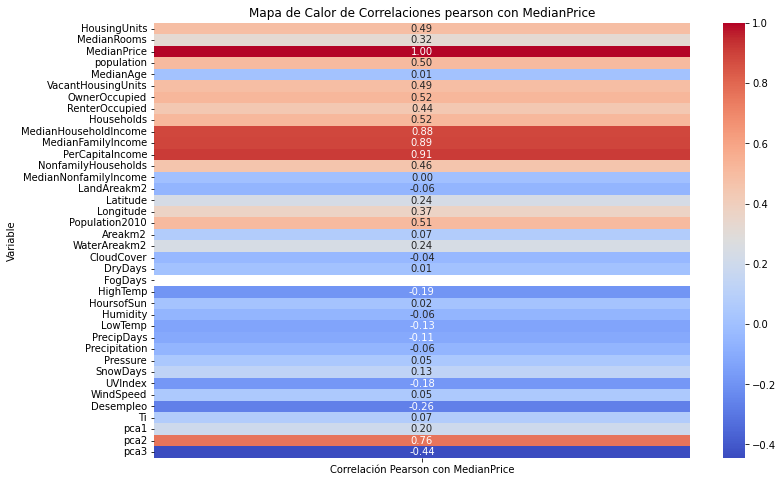

In [73]:
columnas_numericas = values

correlacion_spearman = columnas_numericas.corrwith(data['MedianPrice'], method='pearson')

correlaciones_df = pd.DataFrame({'Variable': correlacion_spearman.index, 'Correlación Pearson con MedianPrice': correlacion_spearman.values})

plt.figure(figsize=(12, 8))
sns.heatmap(data=correlaciones_df.set_index('Variable'), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Mapa de Calor de Correlaciones pearson con MedianPrice')
plt.show()

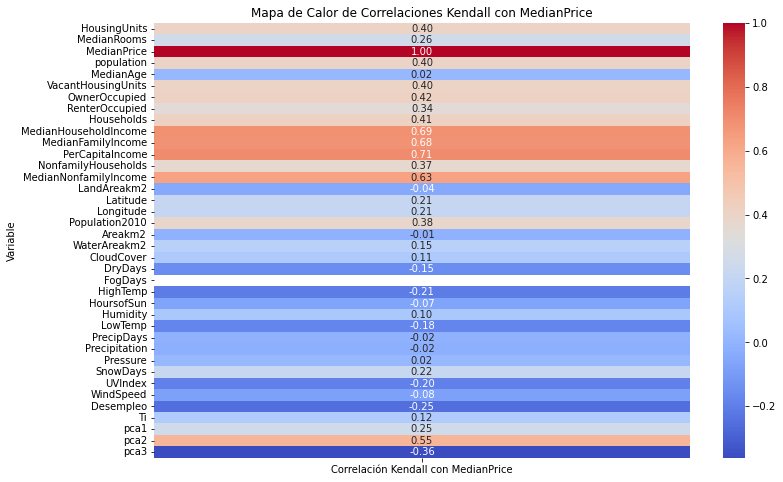

In [74]:
columnas_numericas = values

correlacion_spearman = columnas_numericas.corrwith(data['MedianPrice'], method='kendall')

correlaciones_df = pd.DataFrame({'Variable': correlacion_spearman.index, 'Correlación Kendall con MedianPrice': correlacion_spearman.values})

plt.figure(figsize=(12, 8))
sns.heatmap(data=correlaciones_df.set_index('Variable'), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Mapa de Calor de Correlaciones Kendall con MedianPrice')
plt.show()

### 5.2 Correlacion State y County con la variable objetivo

In [75]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [76]:
modelo = ols('MedianPrice ~ State', data=data).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

print(tabla_anova)

                sum_sq     df          F        PR(>F)
State     9.379130e+11    6.0  23.925374  4.830300e-25
Residual  3.404006e+12  521.0        NaN           NaN


In [77]:
modelo = ols('MedianPrice ~ County', data=data).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

print(tabla_anova)

                sum_sq     df         F    PR(>F)
County    3.675903e+12  417.0  1.455915  0.009274
Residual  6.660161e+11  110.0       NaN       NaN


### 5.3 Dependencias lineales

In [78]:
values.head()

,HousingUnits,MedianRooms,MedianPrice,population,MedianAge,VacantHousingUnits,OwnerOccupied,RenterOccupied,Households,MedianHouseholdIncome,...,Precipitation,Pressure,SnowDays,UVIndex,WindSpeed,Desempleo,Ti,pca1,pca2,pca3
0,118861,5.1,201600,268105,31.7,118861,55696,46283,50803,50089,...,2.8,30.1,0,4,6,4.6,56.877721,-0.744159,0.286232,0.212191
1,10105,5.9,158000,28679,37.8,10105,6756,2072,6448,62299,...,2.9,30.1,0,4,5,4.8,78.135699,-0.606271,-0.011399,0.014282
2,104060,5.0,195000,180076,40.6,104060,49474,24062,47432,56483,...,5.7,30.1,0,4,9,5.1,67.393408,-0.609264,0.077544,0.134977
3,11061,5.4,118900,27723,39.8,11061,6147,3171,5882,43580,...,2.7,30.1,0,4,6,5.1,65.517679,-0.715782,-0.121628,0.122476
4,280648,5.5,220000,594001,47.2,280648,178469,57536,148934,59359,...,2.1,30.1,0,5,9,5.1,75.942800,-0.902821,0.759290,0.491609


In [108]:
import pandas as pd
import statsmodels.api as sm


In [109]:
y = values['MedianPrice']
X = values.drop('MedianPrice', axis=1) 

In [112]:
r_squared_dict = {'Variable': [], 'R_squared': []}

# Ajustar un modelo de regresión lineal para cada variable predictora y calcular el R²
for col in X.columns:
    X_temp = X.drop(col, axis=1)  # Eliminar una variable a la vez
    X_temp = sm.add_constant(X_temp)  # Agregar una constante (intercepto)
    model = sm.OLS(y, X_temp).fit()  # Ajustar el modelo
    r_squared = model.rsquared  # Obtener el R²
    r_squared_dict['Variable'].append(col)
    r_squared_dict['R_squared'].append(r_squared)

# Convertir el diccionario en un DataFrame
r_squared_df = pd.DataFrame(r_squared_dict)
r_squared_df

,Variable,R_squared
0,HousingUnits,1.0
1,MedianRooms,1.0
2,population,1.0
3,MedianAge,1.0
4,VacantHousingUnits,1.0
5,OwnerOccupied,1.0
6,RenterOccupied,1.0
7,Households,1.0
8,MedianHouseholdIncome,1.0
9,MedianFamilyIncome,1.0


In [114]:
vif_dict = {'Variable': [], 'VIF': []}

for col in values.columns:
    if col != 'MedianPrice': 
        X = values.drop([col, 'MedianPrice'], axis=1)
        X = sm.add_constant(X)
        model = sm.OLS(values['MedianPrice'], X).fit()
        r_squared = model.rsquared
        vif = 1 / (1 - r_squared)
        vif_dict['Variable'].append(col)
        vif_dict['VIF'].append(vif)

vif_df = pd.DataFrame(vif_dict)

vif_df

/var/folders/rv/dlx920mn2hj15wkt3g1nkdkn3dpgn4/T/ipykernel_16171/4192912883.py:9: RuntimeWarning:

divide by zero encountered in double_scalars

/var/folders/rv/dlx920mn2hj15wkt3g1nkdkn3dpgn4/T/ipykernel_16171/4192912883.py:9: RuntimeWarning:

divide by zero encountered in double_scalars

/var/folders/rv/dlx920mn2hj15wkt3g1nkdkn3dpgn4/T/ipykernel_16171/4192912883.py:9: RuntimeWarning:

divide by zero encountered in double_scalars

/var/folders/rv/dlx920mn2hj15wkt3g1nkdkn3dpgn4/T/ipykernel_16171/4192912883.py:9: RuntimeWarning:

divide by zero encountered in double_scalars

/var/folders/rv/dlx920mn2hj15wkt3g1nkdkn3dpgn4/T/ipykernel_16171/4192912883.py:9: RuntimeWarning:

divide by zero encountered in double_scalars

/var/folders/rv/dlx920mn2hj15wkt3g1nkdkn3dpgn4/T/ipykernel_16171/4192912883.py:9: RuntimeWarning:

divide by zero encountered in double_scalars

/var/folders/rv/dlx920mn2hj15wkt3g1nkdkn3dpgn4/T/ipykernel_16171/4192912883.py:9: RuntimeWarning:

divide by zero encountered in d

,Variable,VIF
0,HousingUnits,inf
1,MedianRooms,inf
2,population,inf
3,MedianAge,inf
4,VacantHousingUnits,inf
5,OwnerOccupied,inf
6,RenterOccupied,inf
7,Households,inf
8,MedianHouseholdIncome,9.007199e+15
9,MedianFamilyIncome,9.007199e+15


tengo un problema de multicolinealidad perfecta, debo transformar las variables, regularizar 